# 决策树(Decision Tree)与随机森林(Random Forests)

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

## 1. 决策树

### 1.1 决策树的基本原理

**决策树(Decision Tree)** 是一种基本的分类和回归算法（本课程仅讨论决策树在分类中的应用）。决策树模型呈树形结构，在分类问题中，依据样本的特征对实例进行分类，是一种典型的if-then/else-then推导规则，从数学原理上理解，它也可以被认为是定义在特征空间与类别空间上的条件概率分布。

- 学习时: 利用训练数据，根据损失函数最小化的原则建立决策树模型;
- 预测时: 对新的数据，利用决策树模型进行分类。

决策树学习通常包括3个步骤：特征选择、决策树的生成和决策树的修剪。

下面给出一个利用决策树进行判定的图例，要求：根据一系列的属性特征输出特定的人物：

![读心术游戏中的决策树](images/6-001-DecisionTreeEx01.png)

### 1.2 决策树的构建

#### 1. 以wine酒数据集为例，构建一个决策树模型

In [28]:
# 导入numpy计算库
import numpy as np

# 导入画图工具
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 导入tree树模型和数据集加载工具
from sklearn import tree
from sklearn import datasets
# 导入数据拆分工具
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()

# 设置X, y的值。此处为了便于可视化，仅选取前两个特征
X = wine.data[:, :2]
#X = wine.data
y = wine.target
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 2. 配置决策树，并拟合训练集

In [29]:
# 设置决策树的分类器的最大深度为 1
clf = tree.DecisionTreeClassifier(max_depth = 1)
# 拟合训练数据集
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### 3. 可视化分类器结果

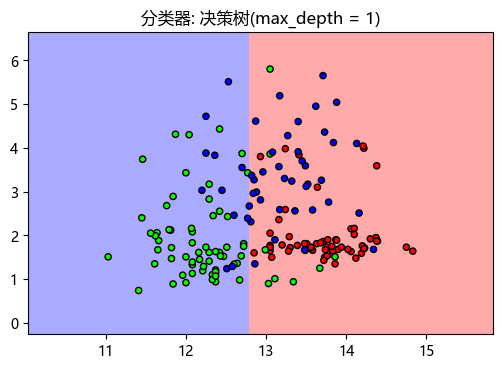

In [52]:
# 定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# 设置特征轴的尺度的粒度
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure(dpi = 100)
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)


# 用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold, edgecolor = 'k', s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt5.title("分类器: 决策树(max_depth = 1)")

plt.show()

<font style="color:red; font-weight:bold;">【知识点】[ravel()函数、flatten()函数和squeeze()函数](functions/numpy.ravel_flatten_squeeze.ipynb)</font>

#### 4. 对比不同深度决策树的分类性能

- 深度 = 3 时

In [40]:
import matplotlib.pyplot as plt3

# 设置决策树的分类器的最大深度，并拟合训练集
clf3 = tree.DecisionTreeClassifier(max_depth = 3)
clf3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

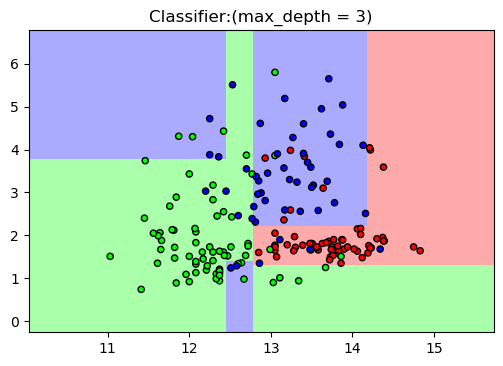

In [41]:
Z3 = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类中的样本分配不同的颜色
Z3 = Z3.reshape(xx.shape)
plt3.figure(dpi = 100)
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt3.pcolormesh(xx, yy, Z3, cmap = cmap_light)

# 用散点把样本表示出来
plt3.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold, edgecolor = 'k', s = 20)
plt3.xlim(xx.min(), xx.max())
plt3.ylim(yy.min(), yy.max())
plt5.title("分类器: 决策树(max_depth = 3)")

plt3.show()

In [42]:
import matplotlib.pyplot as plt5

# 设置决策树的分类器的最大深度，并拟合训练集
clf5 = tree.DecisionTreeClassifier(max_depth = 5)
clf5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

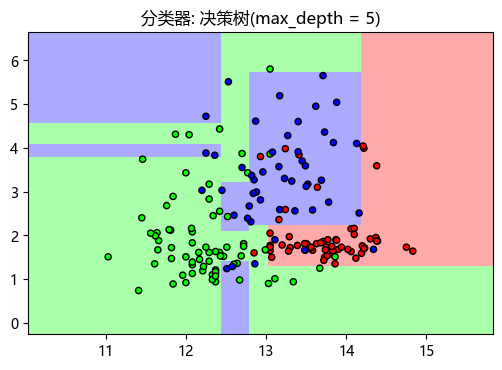

In [51]:
Z5 = clf5.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类中的样本分配不同的颜色
Z5 = Z5.reshape(xx.shape)
plt5.figure(dpi = 100)
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt5.pcolormesh(xx, yy, Z5, cmap = cmap_light)

# 用散点把样本表示出来
plt5.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold, edgecolor = 'k', s = 20)
plt5.xlim(xx.min(), xx.max())
plt5.ylim(yy.min(), yy.max())
plt5.title("分类器: 决策树(max_depth = 5)")

plt5.show()

#### 5. 对模型进行评估

分别评估三个模型在训练集、测试集上的准确率

In [44]:
# 输出模型评分，即正确率
score_train = clf.score(X_train, y_train)
score3_train = clf3.score(X_train, y_train)
score5_train = clf5.score(X_train, y_train)
score_test = clf.score(X_test, y_test)
score3_test = clf3.score(X_test, y_test)
score5_test = clf5.score(X_test, y_test)

print("模型一(树深 = 1)：训练集准确率：{0:.3f}，测试集准确率：{1:.3f}".format(score_train, score_test))
print("模型二(树深 = 3)：训练集准确率：{0:.3f}，测试集准确率：{1:.3f}".format(score3_train, score3_test))
print("模型三(树深 = 5)：训练集准确率：{0:.3f}，测试集准确率：{1:.3f}".format(score5_train, score5_test))

模型一(树深 = 1)：训练集准确率：0.654，测试集准确率：0.756
模型二(树深 = 3)：训练集准确率：0.865，测试集准确率：0.800
模型三(树深 = 5)：训练集准确率：0.917，测试集准确率：0.778


由结果可以得到以下结论：
1. 随着决策树的深度增加，模型的性能得到了一定的提升（*在一定范围内*）;
2. 深度增加到5时，模型出现了过拟合现象。即：训练集性能持续提高，测试集性能出现了降低。

<font color="blue">下面请大家尝试，在Wine酒数据集上使用**决策树**对<span style="color:red;font-weight:bold;">所有特征</span>进行建模，并给出树深分别为{1, 3, 5}时的模型准确率。</font>

### 1.3 决策树的优缺点

- 优点：计算复杂度低，分类速度快，模型易于理解、可读性高，对中间值的缺失不敏感
- 缺点：可能会产生过度匹配问题
- 适用数据类型：数值型和标称型

### 1.4 决策树的工作过程的可视化

*(不要求掌握该方法，只需要能理解即可)*

Graphviz (Graph Visualization Software) 是一个由AT&T实验室启动的开源工具包，可以用于绘制各种流程图和结构图。它依赖于DOT描述语言，DOT是一种图形描述语言，具有简单易学的特点。

对于程序员来说，关于Graphviz有一句很著名的话：<font color="blue">So in short, if you are a programmer, it is born for you。</font>

- 安装graphviz

1. 官网下载 [graphviz](https://graphviz.gitlab.io/_pages/Download/Download_windows.html), 并进行安装
2. 添加系统变量，将" ~/Graphviz2.38"和"Graphviz2.38\bin"添加到环境变量；将" ~/Graphviz2.38\bin\dot.exe"添加到系统变量。
3. pip install graphviz 或 conda install graphviz

- 绘制流程图

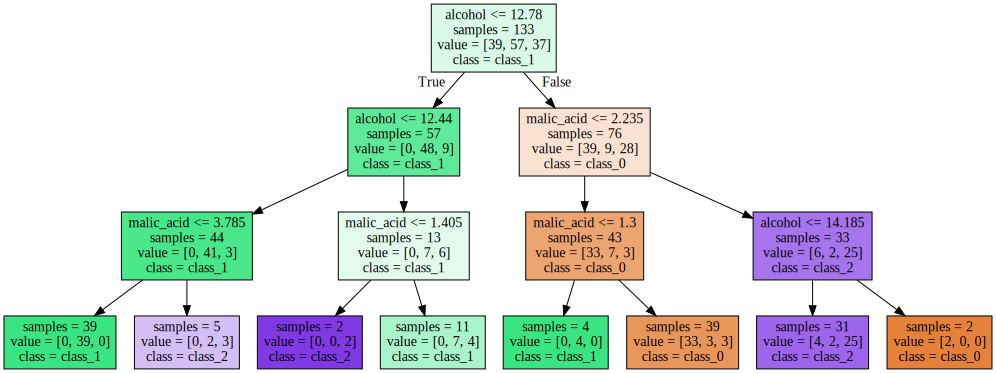

In [56]:
# 载入graphviz绘图工具包
import graphviz

# 导入决策树中输出graphiviz的接口
from sklearn.tree import export_graphviz

#选择分类模型
export_graphviz(clf3, out_file = "tmp/wine.dot", \
                class_names = wine.target_names, \
                feature_names = wine.feature_names[:2], \
                impurity = False, filled = True)
# 打开dot文件
with open("tmp/wine.dot") as f:
    dot_graph = f.read()
    
# 显示dot文件中的图形
graphviz.Source(dot_graph)

## 2. 随机森林

决策树是一种比较简单的算法，但是很容易出现过拟合问题*（前面我们已经看到了这个现象）*，一个比较好的解决办法是，将更多的树扩展成森林————随机森林。

随机森林是一种有监督学习算法，它是以决策树为**基学习器**的集成学习算法。随机森林非常简单，易于实现，计算开销也很小，但是它在分类和回归上表现出非常惊人的性能，因此，随机森林被誉为“代表集成学习技术水平的方法”。

### 2.1 随机森林的基本概念

在机器学习中，**随机森林**是一个包含多个决策树的分类器，其输出的类别是由每棵树的输出进行联合判决。随机森林最初是由Leo Breiman和Adele Cutler提出，并以"Random Forests"作为商标，而该术语则是由贝尔实验室的Tin Kam Ho所提出的随机决策森林（random decision forests）而来。

以下给出，随机森林的算法过程：

```python
1. 假设用 N 来表示训练样本的个数，M 表示特征的数目;
2. 输入特征数目 m，用于确定决策树上一个节点的决策结果；其中 m 应远小于 M;
3. 从 N 个训练样本中以（放回）抽样的方式，取样 N 次，形成一个训练集（即 bootstrap取样），并用未抽到的用例（样本）作预测，评估其误差；
4. 对于每一个节点，随机选择 m个特征，决策树上每个节点的决定都是基于这些特征确定的。根据这 m个特征，计算其最佳的分裂方式。
5. 每棵树都会完整成长而不会剪枝，这有可能在建完一棵正常树状分类器后会被采用。
```

![随机森林](http://5b0988e595225.cdn.sohucs.com/images/20190227/28f73a8b32ec4ef68430c568dd37285c.jpeg)

### 2.2 随机森林的构建

1. 继续使用决策树中所使用的Wine酒数据集。

In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 导入随机森林模型
from sklearn.ensemble import RandomForestClassifier

wine = datasets.load_wine()
X = wine.data[:, :2] # 为便于可视化仍然仅使用前两个特征
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 设定随机森林中树的数量，此处 = 6
forest = RandomForestClassifier(n_estimators = 6, random_state = 3)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

**关于随机森林参数的一些解释：**
- bootstrap: 
- class_weight:
- max_features:
- n_estimators:
- n_jobs:
- random_state:

2. 可视化分类结果

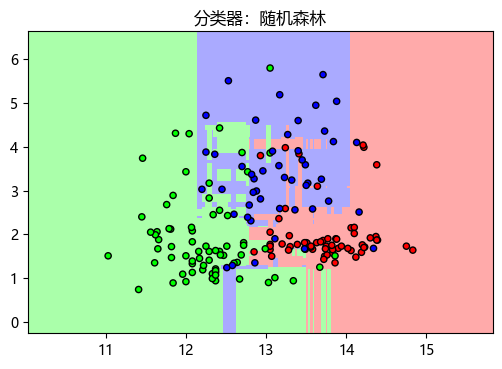

In [49]:
# 定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# 设置特征轴的尺度的粒度
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure(dpi = 100)
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# 用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold, edgecolor = 'k', s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("分类器：随机森林")

plt.show()

### 2.3 随机森林的优缺点

随机森林的优点有 [2]  ：
1）对于很多种资料，它可以产生高准确度的分类器；
2）它可以处理大量的输入变数；
3）它可以在决定类别时，评估变数的重要性；
4）在建造森林时，它可以在内部对于一般化后的误差产生不偏差的估计；
5）它包含一个好方法可以估计遗失的资料，并且，如果有很大一部分的资料遗失，仍可以维持准确度；
6）它提供一个实验方法，可以去侦测variable interactions；
7）对于不平衡的分类资料集来说，它可以平衡误差；
8）它计算各例中的亲近度，对于数据挖掘、侦测离群点（outlier）和将资料视觉化非常有用；
9）使用上述。它可被延伸应用在未标记的资料上，这类资料通常是使用非监督式聚类。也可侦测偏离者和观看资料；
10）学习过程是很快速的。

优点
由于采用了集成算法，本身精度比大多数单个算法要好，所以准确性高
在测试集上表现良好，由于两个随机性的引入，使得随机森林不容易陷入过拟合（样本随机，特征随机）
在工业上，由于两个随机性的引入，使得随机森林具有一定的抗噪声能力，对比其他算法具有一定优势
由于树的组合，使得随机森林可以处理非线性数据，本身属于非线性分类（拟合）模型
它能够处理很高维度（feature很多）的数据，并且不用做特征选择，对数据集的适应能力强：既能处理离散型数据，也能处理连续型数据，数据集无需规范化
训练速度快，可以运用在大规模数据集上
可以处理缺省值（单独作为一类），不用额外处理
由于有袋外数据（OOB），可以在模型生成过程中取得真实误差的无偏估计，且不损失训练数据量
在训练过程中，能够检测到feature间的互相影响，且可以得出feature的重要性，具有一定参考意义
由于每棵树可以独立、同时生成，容易做成并行化方法
由于实现简单、精度高、抗过拟合能力强，当面对非线性数据时，适于作为基准模型
缺点
当随机森林中的决策树个数很多时，训练时需要的空间和时间会比较大
随机森林中还有许多不好解释的地方，有点算是黑盒模型
在某些噪音比较大的样本集上，RF的模型容易陷入过拟合

## 3. 随机森林实例——基于adult数据集的相亲

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree, datasets
from sklearn.model_selection import train_test_split

In [109]:
wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [110]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
clf.score(X_test, y_test)

0.68888888888888888

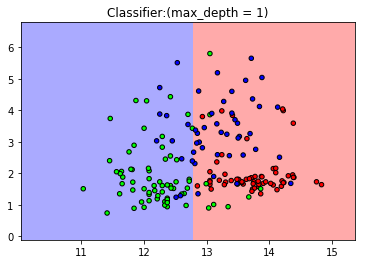

In [112]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 1)")

plt.show()


In [113]:
clf2 = tree.DecisionTreeClassifier(max_depth=3)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
clf2.score(X_test, y_test)

0.75555555555555554

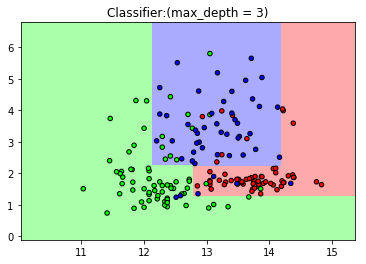

In [115]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 3)")

plt.show()

In [116]:
clf3 = tree.DecisionTreeClassifier(max_depth=5)
clf3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [117]:
clf3.score(X_test, y_test)

0.73333333333333328

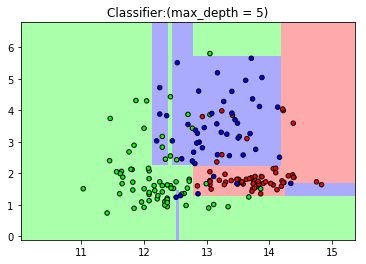

In [118]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 5)")

plt.show()

In [119]:
import graphviz
from sklearn.tree import export_graphviz

In [120]:
export_graphviz(clf2, out_file="wine.dot", class_names=wine.target_names,
feature_names=wine.feature_names[:2], impurity=False, filled=True)

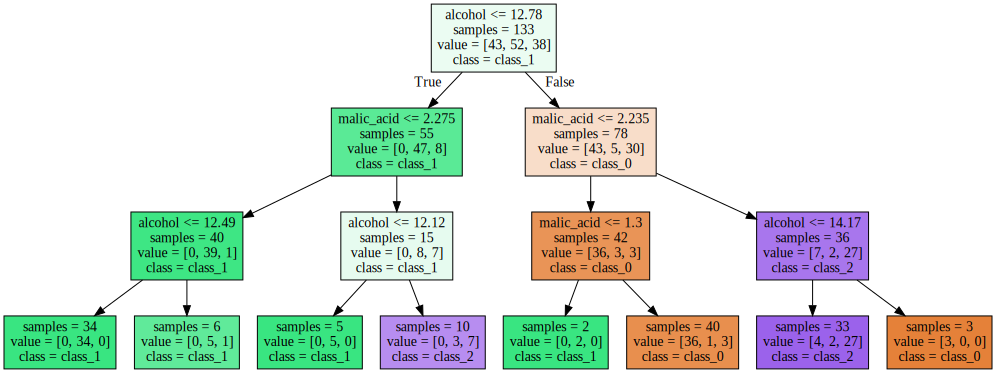

In [121]:
with open("wine.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [122]:
import pandas as pd
data = pd.read_csv('adult.csv', header=None, index_col=False,
                  names=['年龄','单位性质','权重','学历','受教育时长',
                        '婚姻状况','职业','家庭情况','种族','性别',
                        '资产所得','资产损失','周工作时长','原籍',
                        '收入'])
#为了方便展示，我们选取其中一部分数据
data_lite = data[['年龄','单位性质','学历','性别','周工作时长',
                 '职业','收入']]
#下面看一下数据的前5行是不是我们想要的结果
display(data_lite.head())

,年龄,单位性质,学历,性别,周工作时长,职业,收入
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [123]:
data_dummies = pd.get_dummies(data_lite)
print('样本原始特征:\n',list(data_lite.columns),'\n')
print('虚拟变量特征:\n',list(data_dummies.columns))

样本原始特征:
 ['年龄', '单位性质', '学历', '性别', '周工作时长', '职业', '收入'] 

虚拟变量特征:
 ['年龄', '周工作时长', '单位性质_ ?', '单位性质_ Federal-gov', '单位性质_ Local-gov', '单位性质_ Never-worked', '单位性质_ Private', '单位性质_ Self-emp-inc', '单位性质_ Self-emp-not-inc', '单位性质_ State-gov', '单位性质_ Without-pay', '学历_ 10th', '学历_ 11th', '学历_ 12th', '学历_ 1st-4th', '学历_ 5th-6th', '学历_ 7th-8th', '学历_ 9th', '学历_ Assoc-acdm', '学历_ Assoc-voc', '学历_ Bachelors', '学历_ Doctorate', '学历_ HS-grad', '学历_ Masters', '学历_ Preschool', '学历_ Prof-school', '学历_ Some-college', '性别_ Female', '性别_ Male', '职业_ ?', '职业_ Adm-clerical', '职业_ Armed-Forces', '职业_ Craft-repair', '职业_ Exec-managerial', '职业_ Farming-fishing', '职业_ Handlers-cleaners', '职业_ Machine-op-inspct', '职业_ Other-service', '职业_ Priv-house-serv', '职业_ Prof-specialty', '职业_ Protective-serv', '职业_ Sales', '职业_ Tech-support', '职业_ Transport-moving', '收入_ <=50K', '收入_ >50K']


In [124]:
data_dummies.head()

,年龄,周工作时长,单位性质_ ?,单位性质_ Federal-gov,单位性质_ Local-gov,单位性质_ Never-worked,单位性质_ Private,单位性质_ Self-emp-inc,单位性质_ Self-emp-not-inc,单位性质_ State-gov,...,职业_ Machine-op-inspct,职业_ Other-service,职业_ Priv-house-serv,职业_ Prof-specialty,职业_ Protective-serv,职业_ Sales,职业_ Tech-support,职业_ Transport-moving,收入_ <=50K,收入_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [125]:
features = data_dummies.loc[:,'年龄':'职业_ Transport-moving']
X = features.values
y = data_dummies['收入_ >50K'].values
print('特征形态:{} 标签形态:{}'.format(X.shape, y.shape))

特征形态:(32561, 44) 标签形态:(32561,)


In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
go_dating_tree = tree.DecisionTreeClassifier(max_depth=5)
go_dating_tree.fit(X_train,y_train)
print('模型得分:{:.2f}'.format(go_dating_tree.score(X_test,y_test)))

模型得分:0.80


Mr Z,年龄37，单位性质为国家机关，学历为硕士，性别男（当然了），每周工作40小时，职业是文员（Adm-clerical），现在我们用模型预测下他的收入。

['年龄', '周工作时长', '单位性质_ ?', '单位性质_ Federal-gov', '单位性质_ Local-gov', '单位性质_ Never-worked', '单位性质_ Private', '单位性质_ Self-emp-inc', '单位性质_ Self-emp-not-inc', '单位性质_ State-gov', '单位性质_ Without-pay', '学历_ 10th', '学历_ 11th', '学历_ 12th', '学历_ 1st-4th', '学历_ 5th-6th', '学历_ 7th-8th', '学历_ 9th', '学历_ Assoc-acdm', '学历_ Assoc-voc', '学历_ Bachelors', '学历_ Doctorate', '学历_ HS-grad', '学历_ Masters', '学历_ Preschool', '学历_ Prof-school', '学历_ Some-college', '性别_ Female', '性别_ Male', '职业_ ?', '职业_ Adm-clerical', '职业_ Armed-Forces', '职业_ Craft-repair', '职业_ Exec-managerial', '职业_ Farming-fishing', '职业_ Handlers-cleaners', '职业_ Machine-op-inspct', '职业_ Other-service', '职业_ Priv-house-serv', '职业_ Prof-specialty', '职业_ Protective-serv', '职业_ Sales', '职业_ Tech-support', '职业_ Transport-moving', '收入_ <=50K', '收入_ >50K']

In [127]:
Mr_Z =[[37, 40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,
       0,0,0,0,0,0,0,0,0,0,0,0,0]]
Mr_Z

[[37,
  40,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]]

In [128]:
dating_dec = go_dating_tree.predict(Mr_Z)
if dating_dec == 1:
    print("大胆去追求真爱吧，这哥们月薪过5万了！")
else:
    print("不用去了，不满足你的要求")

不用去了，不满足你的要求


In [129]:
from sklearn.ensemble import RandomForestClassifier
wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [145]:
forest = RandomForestClassifier(n_estimators=25,random_state=3)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [146]:
print(forest.score(X_test, y_test))

0.8


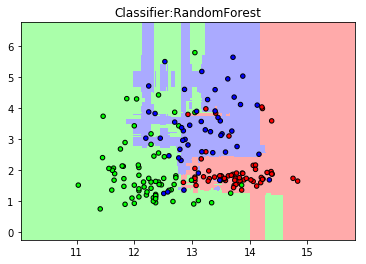

In [147]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")

plt.show()